# Performing DEG analysis (limma, R) on Pseudobulking from atlas
* Primary tumour samples only
* dataframes made previously (2025-01-13_Pseudobulking.jpynb), seperate for each DC subset and each has seperate metadata file

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

# Load DEG lists made in previous notebook:

In [3]:
tt1_mregDC <- read.csv("tt1_mregDC.csv", row.names = 1)
tt2_mregDC <- read.csv("tt2_mregDC.csv", row.names = 1)
tt3_mregDC <- read.csv("tt3_mregDC.csv", row.names = 1)
tt4_mregDC <- read.csv("tt4_mregDC.csv", row.names = 1)
tt5_mregDC <- read.csv("tt5_mregDC.csv", row.names = 1)
tt6_mregDC <- read.csv("tt6_mregDC.csv", row.names = 1)
tt7_mregDC <- read.csv("tt7_mregDC.csv", row.names = 1)
tt8_mregDC <- read.csv("tt8_mregDC.csv", row.names = 1)
tt9_mregDC <- read.csv("tt9_mregDC.csv", row.names = 1)
tt10_mregDC <- read.csv("tt10_mregDC.csv", row.names = 1)
tt11_mregDC <- read.csv("tt11_mregDC.csv", row.names = 1)

tt1_cDC1 <- read.csv("tt1_cDC1.csv", row.names = 1)
tt2_cDC1 <- read.csv("tt2_cDC1.csv", row.names = 1)
tt3_cDC1 <- read.csv("tt3_cDC1.csv", row.names = 1)
tt4_cDC1 <- read.csv("tt4_cDC1.csv", row.names = 1)
tt5_cDC1 <- read.csv("tt5_cDC1.csv", row.names = 1)
tt6_cDC1 <- read.csv("tt6_cDC1.csv", row.names = 1)
tt7_cDC1 <- read.csv("tt7_cDC1.csv", row.names = 1)
tt8_cDC1 <- read.csv("tt8_cDC1.csv", row.names = 1)
tt9_cDC1 <- read.csv("tt9_cDC1.csv", row.names = 1)
tt10_cDC1 <- read.csv("tt10_cDC1.csv", row.names = 1)
tt11_cDC1 <- read.csv("tt11_cDC1.csv", row.names = 1)

tt1_cDC2 <- read.csv("tt1_cDC2.csv", row.names = 1)
tt2_cDC2 <- read.csv("tt2_cDC2.csv", row.names = 1)
tt3_cDC2 <- read.csv("tt3_cDC2.csv", row.names = 1)
tt4_cDC2 <- read.csv("tt4_cDC2.csv", row.names = 1)
tt5_cDC2 <- read.csv("tt5_cDC2.csv", row.names = 1)
tt6_cDC2 <- read.csv("tt6_cDC2.csv", row.names = 1)
tt7_cDC2 <- read.csv("tt7_cDC2.csv", row.names = 1)
tt8_cDC2 <- read.csv("tt8_cDC2.csv", row.names = 1)
tt9_cDC2 <- read.csv("tt9_cDC2.csv", row.names = 1)
tt10_cDC2 <- read.csv("tt10_cDC2.csv", row.names = 1)
tt11_cDC2 <- read.csv("tt11_cDC2.csv", row.names = 1)

In [5]:
head(tt1_mregDC)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


In [10]:
#define list containing all my deg lists
degs_mregDC <- list(
  contrast_BC = tt1_mregDC,  
  contrast_CRC = tt2_mregDC,
  contrast_GAC = tt3_mregDC,
  contrast_GBM = tt4_mregDC,
  contrast_HCC = tt5_mregDC,
  contrast_HNSCC = tt6_mregDC,
  contrast_iCCA = tt7_mregDC,
  contrast_MEL = tt8_mregDC,
  contrast_NPC = tt9_mregDC,
  contrast_NSCLC = tt10_mregDC,
  contrast_PDAC = tt11_mregDC
)

#define list containing all my deg lists
degs_cDC1 <- list(
  contrast_BC = tt1_cDC1,  
  contrast_CRC = tt2_cDC1,
  contrast_GAC = tt3_cDC1,
  contrast_GBM = tt4_cDC1,
  contrast_HCC = tt5_cDC1,
  contrast_HNSCC = tt6_cDC1,
  contrast_iCCA = tt7_cDC1,
  contrast_MEL = tt8_cDC1,
  contrast_NPC = tt9_cDC1,
  contrast_NSCLC = tt10_cDC1,
  contrast_PDAC = tt11_cDC1
)

#define list containing all my deg lists
degs_cDC2 <- list(
  contrast_BC = tt1_cDC2,  
  contrast_CRC = tt2_cDC2,
  contrast_GAC = tt3_cDC2,
  contrast_GBM = tt4_cDC2,
  contrast_HCC = tt5_cDC2,
  contrast_HNSCC = tt6_cDC2,
  contrast_iCCA = tt7_cDC2,
  contrast_MEL = tt8_cDC2,
  contrast_NPC = tt9_cDC2,
  contrast_NSCLC = tt10_cDC2,
  contrast_PDAC = tt11_cDC2
)

# Removing tissue specific genes from DEG lists:

In [8]:
# load ovary specific genes (from TIGER)
ovary_TIGER <- read.csv("ovary_TIGER.csv", header = FALSE, col.names = c("ovary"))

In [11]:
ovary_vector <- ovary_TIGER[[1]]

In [19]:
ovary_vector

[1] "ASIP"           "FLJ42957"       "TTC16"          "TOR2A"         
  [5] "SOX17"          "WT1"            "LOC387745"      "PDLIM4"        
  [9] "LOC440688"      "LOC90133"       "IQGAP3"         "LMX1B"         
 [13] "RPL14L"         "SLC34A2"        "FLJ35429"       "CLDN6"         
 [17] "PAEP"           "HIST1H2BG"      "LRFN1"          "CDH6"          
 [21] "WFDC2"          "LOC253264"      "LOC390919"      "LOC253013"     
 [25] "MELL1"          "LHX1"           "ALOX12P2"       "LOC146439"     
 [29] "SIGLEC11"       "ZNF286"         "EIF3S12"        "FOXL2"         
 [33] "SNX6"           "SEMA3D"         "EMID2"          "FLJ14054"      
 [37] "KLK5"           "DOK5"           "FST"            "MEOX1"         
 [41] "TNFRSF10A"      "DPT"            "SLC4A11"        "ARX"           
 [45] "COL13A1"        "ATP5J2"         "ISL2"           "ZNF77"         
 [49] "KLK7"           "TSHR"           "PFC"            "MSLN"          
 [53] "LOC374569"      "KIAA1210"       "ABCB6"          "GPR39"         
 [57] "FCGRT"          "TSGA13"         "NMU"            "ATP6V0E"       
 [61] "MMP10"          "HAND2"          "LOC400550"      "BMP6"          
 [65] "NXF3"           "SPON1"          "TJP3"           "FOLR1"         
 [69] "VTCN1"          "ZNF92"          "C10orf13"       "KIT"           
 [73] "HRASLS"         "RPL14"          "CDAN1"          "CILP"          
 [77] "KLK10"          "ESPN"           "MRPL41"         "PLEKHF1"       
 [81] "FLJ12571"       "COL9A1"         "SOCS1"          "FLJ11078"      
 [85] "FZD7"           "ZNF503"         "DKFZP564O0523"  "ADAM28"        
 [89] "SLC39A4"        "CCDC8"          "CRABP1"         "VIT"           
 [93] "LOC130576"      "RPL38"          "ADAMTS15"       "XKR8"          
 [97] "FLJ22269"       "LOC441027"      "CLCF1"          "OLFML2A"       
[101] "FLJ14466"       "FLJ22833"       "PRIMA1"         "UPK1B"         
[105] "PCMTD1"         "Beta4GalNAc-T4" "GATA6"          "HSD11B1"       
[109] "LOC441378"      "PVT1"           "TYSND1"         "SIM2"          
[113] "NRP2"           "STX1A"          "WTIP"           "FKSG24"        
[117] "GATA4"          "SNCG"           "SOCS3"          "CRISPLD1"      
[121] "SERTAD3"        "PAX8"           "EMILIN3"        "TMPRSS13"      
[125] "LIN28"          "SN"             "GAB2"           "CISH"          
[129] "BIVM"           "SFXN4"          "C14orf4"        "C11orf43"      
[133] "DHCR24"         "PRPF31"         "RTN4R"          "ISLR"          
[137] "STYXL1"         "SPINT2"         "KLK11"          "IGFBP2"        
[141] "TMEM100"

In [28]:
# make new empty list 
filtered_degs_mregDC <- list()

# Loop through each DEG list, filter it for genes in ovary
for (name in names(degs_mregDC)) {
  original_count <- nrow(degs_mregDC[[name]])  # Count before filtering

  filtered_list <- degs_mregDC[[name]][!(rownames(degs_mregDC[[name]]) %in% ovary_vector), , drop = FALSE]
  filtered_count <- nrow(filtered_list)  # Count after filtering
  
  # Store the filtered data frame
  filtered_degs_mregDC[[name]] <- filtered_list
  
  # Print how many genes were removed
  cat(sprintf("%s: Removed %d genes\n", name, original_count - filtered_count))
}

contrast_BC: Removed 40 genes
contrast_CRC: Removed 40 genes
contrast_GAC: Removed 40 genes
contrast_GBM: Removed 40 genes
contrast_HCC: Removed 40 genes
contrast_HNSCC: Removed 40 genes
contrast_iCCA: Removed 40 genes
contrast_MEL: Removed 40 genes
contrast_NPC: Removed 40 genes
contrast_NSCLC: Removed 40 genes
contrast_PDAC: Removed 40 genes


In [29]:
# make new empty list 
filtered_degs_cDC1 <- list()

# Loop through each DEG list, filter it for genes in ovary
for (name in names(degs_cDC1)) {
  original_count <- nrow(degs_cDC1[[name]])  # Count before filtering

  filtered_list <- degs_cDC1[[name]][!(rownames(degs_cDC1[[name]]) %in% ovary_vector), , drop = FALSE]
  filtered_count <- nrow(filtered_list)  # Count after filtering
  
  # Store the filtered data frame
  filtered_degs_cDC1[[name]] <- filtered_list
  
  # Print how many genes were removed
  cat(sprintf("%s: Removed %d genes\n", name, original_count - filtered_count))
}

contrast_BC: Removed 36 genes
contrast_CRC: Removed 36 genes
contrast_GAC: Removed 36 genes
contrast_GBM: Removed 36 genes
contrast_HCC: Removed 36 genes
contrast_HNSCC: Removed 36 genes
contrast_iCCA: Removed 36 genes
contrast_MEL: Removed 36 genes
contrast_NPC: Removed 36 genes
contrast_NSCLC: Removed 36 genes
contrast_PDAC: Removed 36 genes


In [30]:
# make new empty list 
filtered_degs_cDC2 <- list()

# Loop through each DEG list, filter it for genes in ovary
for (name in names(degs_cDC2)) {
  original_count <- nrow(degs_cDC2[[name]])  # Count before filtering

  filtered_list <- degs_cDC2[[name]][!(rownames(degs_cDC2[[name]]) %in% ovary_vector), , drop = FALSE]
  filtered_count <- nrow(filtered_list)  # Count after filtering
  
  # Store the filtered data frame
  filtered_degs_cDC2[[name]] <- filtered_list
  
  # Print how many genes were removed
  cat(sprintf("%s: Removed %d genes\n", name, original_count - filtered_count))
}

contrast_BC: Removed 50 genes
contrast_CRC: Removed 50 genes
contrast_GAC: Removed 50 genes
contrast_GBM: Removed 50 genes
contrast_HCC: Removed 50 genes
contrast_HNSCC: Removed 50 genes
contrast_iCCA: Removed 50 genes
contrast_MEL: Removed 50 genes
contrast_NPC: Removed 50 genes
contrast_NSCLC: Removed 50 genes
contrast_PDAC: Removed 50 genes


# Performing GSEA:

In [31]:
library(clusterProfiler)
library('org.Hs.eg.db')
library(enrichplot)
library(org.Hs.eg.db)
library(msigdbr)
library(dplyr)



clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind

## Gene sets I will compare: 
* inflammatory --> GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE
* regulatory --> GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE

In [39]:
# Load MSigDB GO BP terms for Homo sapiens
msig_all <- msigdbr(species = "Homo sapiens")

In [40]:
# Extract the gene sets of interest
immune_go_terms <- msig_all %>%
  filter(gs_name %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "HALLMARK_CHOLESTEROL_HOMEOSTASIS",
                        "HALLMARK_INFLAMMATORY_RESPONSE",
                        "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                        "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                        "HALLMARK_TGF_BETA_SIGNALING",
                        "HALLMARK_TNFA_SIGNALING_VIA_NFKB",
                        "GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS",
                        "GOBP_RESPONSE_TO_TYPE_I_INTERFERON",
                        "GOBP_RESPONSE_TO_TYPE_II_INTERFERON",
                        "GOBP_RESPONSE_TO_TYPE_III_INTERFERON",
                        "GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_DN",
                        "GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_UP",
                        "GSE9946_IMMATURE_VS_MATURE_STIMULATORY_DC_DN",
                        "GSE9946_IMMATURE_VS_MATURE_STIMULATORY_DC_UP",
                        "GSE9946_IMMATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_IMMATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP",
                        "GSE9946_LISTERIA_INF_MATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_LISTERIA_INF_MATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP",
                        "GSE9946_MATURE_STIMULATORY_VS_LISTERIA_INF_MATURE_DC_DN",
                        "GSE9946_MATURE_STIMULATORY_VS_LISTERIA_INF_MATURE_DC_UP",
                        "GSE9946_MATURE_STIMULATORY_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_MATURE_STIMULATORY_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP"))

In [41]:
immune_go_terms_df <- as.data.frame(immune_go_terms)

In [42]:
#extract just the columns of interest 
immune_go_clean <- immune_go_terms_df[, c("gs_name", "entrez_gene")]
colnames(immune_go_clean) <- c("term", "ENTREZID")
head(immune_go_clean)
tail(immune_go_clean)

,term,ENTREZID
,<chr>,<int>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2
2,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,730249
3,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,103
4,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,196
5,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,246
6,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,259


,term,ENTREZID
,<chr>,<int>
4050,HALLMARK_TNFA_SIGNALING_VIA_NFKB,7280
4051,HALLMARK_TNFA_SIGNALING_VIA_NFKB,7422
4052,HALLMARK_TNFA_SIGNALING_VIA_NFKB,79693
4053,HALLMARK_TNFA_SIGNALING_VIA_NFKB,65986
4054,HALLMARK_TNFA_SIGNALING_VIA_NFKB,80149
4055,HALLMARK_TNFA_SIGNALING_VIA_NFKB,7538


In [44]:
#define a function to automate the GSEA process for each deg list
run_gsea <- function(gene_list, term2gene) {
  # 1. Sort genes by logFC (descending) to create a ranked list
  gene_list <- gene_list %>%
    arrange(desc(logFC))  

  # 2. Convert gene symbols (from "Symbol" column) to ENTREZ IDs
  gene_list$ENTREZID <- mapIds(org.Hs.eg.db, 
                               keys = gene_list$Symbol,  
                               column = "ENTREZID",      
                               keytype = "SYMBOL", 
                               multiVals = "first")  

  # 3. Remove genes without an ENTREZ ID
  gene_list <- gene_list %>% filter(!is.na(ENTREZID))

  # 4. Create a named numeric vector for GSEA
  ranked_genes <- setNames(gene_list$logFC, gene_list$ENTREZID)

  # 5. Run GSEA
  gsea_results <- GSEA(geneList = ranked_genes,   
                       TERM2GENE = term2gene,     
                       pvalueCutoff = 0.05)       

  return(gsea_results)  
}

In [71]:
# run GSEA on all deg lists
gsea_results_list_mregDC <- lapply(filtered_degs_mregDC, run_gsea, term2gene = immune_go_clean)
gsea_results_list_cDC1 <- lapply(filtered_degs_cDC1, run_gsea, term2gene = immune_go_clean)
gsea_results_list_cDC2 <- lapply(filtered_degs_cDC2, run_gsea, term2gene = immune_go_clean)

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.1% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = 

In [72]:
# Assign contrast names to results
names(gsea_results_list_mregDC) <- names(filtered_degs_mregDC)
names(gsea_results_list_cDC1) <- names(filtered_degs_cDC1)
names(gsea_results_list_cDC2) <- names(filtered_degs_cDC2)

## extract and visualise results

In [73]:
# Define list of pathways
pathways_of_interest <- c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "HALLMARK_CHOLESTEROL_HOMEOSTASIS",
                        "HALLMARK_INFLAMMATORY_RESPONSE",
                        "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                        "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                        "HALLMARK_TGF_BETA_SIGNALING",
                        "HALLMARK_TNFA_SIGNALING_VIA_NFKB",
                        "GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS",
                        "GOBP_RESPONSE_TO_TYPE_I_INTERFERON",
                        "GOBP_RESPONSE_TO_TYPE_II_INTERFERON",
                        "GOBP_RESPONSE_TO_TYPE_III_INTERFERON",
                        "GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_DN",
                        "GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_UP",
                        "GSE9946_IMMATURE_VS_MATURE_STIMULATORY_DC_DN",
                        "GSE9946_IMMATURE_VS_MATURE_STIMULATORY_DC_UP",
                        "GSE9946_IMMATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_IMMATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP",
                        "GSE9946_LISTERIA_INF_MATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_LISTERIA_INF_MATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP",
                        "GSE9946_MATURE_STIMULATORY_VS_LISTERIA_INF_MATURE_DC_DN",
                        "GSE9946_MATURE_STIMULATORY_VS_LISTERIA_INF_MATURE_DC_UP",
                        "GSE9946_MATURE_STIMULATORY_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_DN",
                        "GSE9946_MATURE_STIMULATORY_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP")

In [94]:
# Initialize empty list 
enrichment_scores_mregDC <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list_mregDC)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list_mregDC[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_mregDC[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}

# Combine all the results into one dataframe
enrichment_scores_df_mregDC <- do.call(rbind, enrichment_scores_mregDC)

In [95]:
# Initialize empty list 
enrichment_scores_cDC1 <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list_cDC1)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list_cDC1[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_cDC1[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}

# Combine all the results into one dataframe
enrichment_scores_df_cDC1 <- do.call(rbind, enrichment_scores_cDC1)

In [96]:
# Initialize empty list 
enrichment_scores_cDC2 <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list_cDC2)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list_cDC2[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_cDC2[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}

# Combine all the results into one dataframe
enrichment_scores_df_cDC2 <- do.call(rbind, enrichment_scores_cDC2)

In [98]:
library(ggplot2)
library(reshape2)

In [99]:
# Reshape the data to wide and then long format for plotting
es_mregDC_wide <- dcast(enrichment_scores_df_mregDC, ID ~ contrast, value.var = "NES")
es_mregDC_long <- melt(es_mregDC_wide, id.vars = "ID", variable.name = "contrast", value.name = "NES")

es_cDC1_wide <- dcast(enrichment_scores_df_cDC1, ID ~ contrast, value.var = "NES")
es_cDC1_long <- melt(es_cDC1_wide, id.vars = "ID", variable.name = "contrast", value.name = "NES")

es_cDC2_wide <- dcast(enrichment_scores_df_cDC2, ID ~ contrast, value.var = "NES")
es_cDC2_long <- melt(es_cDC2_wide, id.vars = "ID", variable.name = "contrast", value.name = "NES")

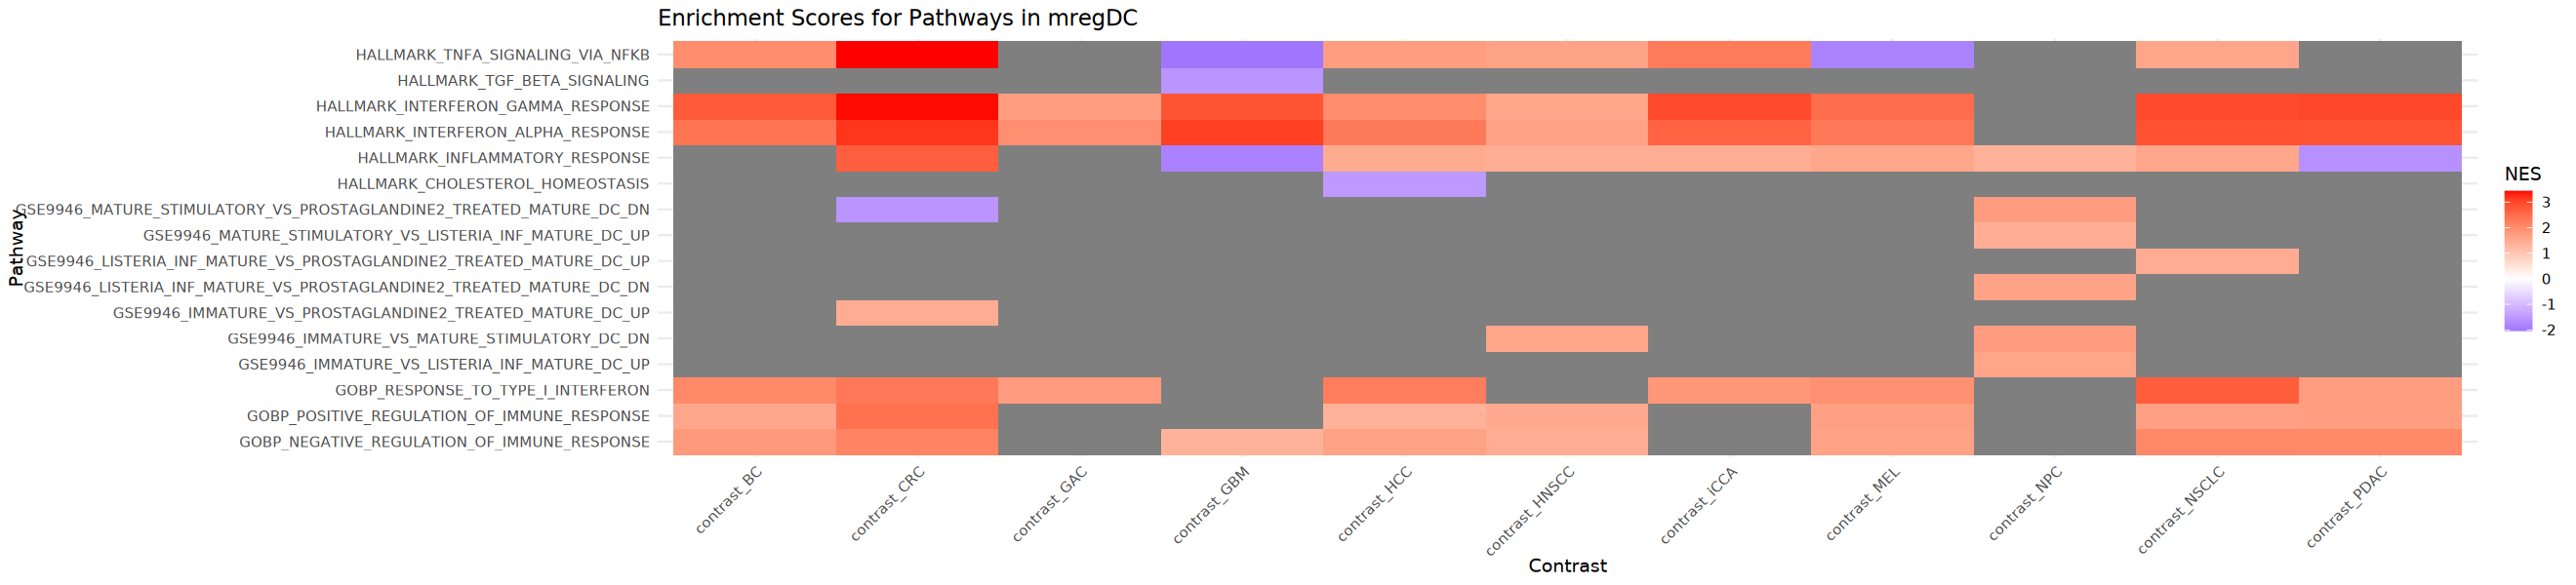

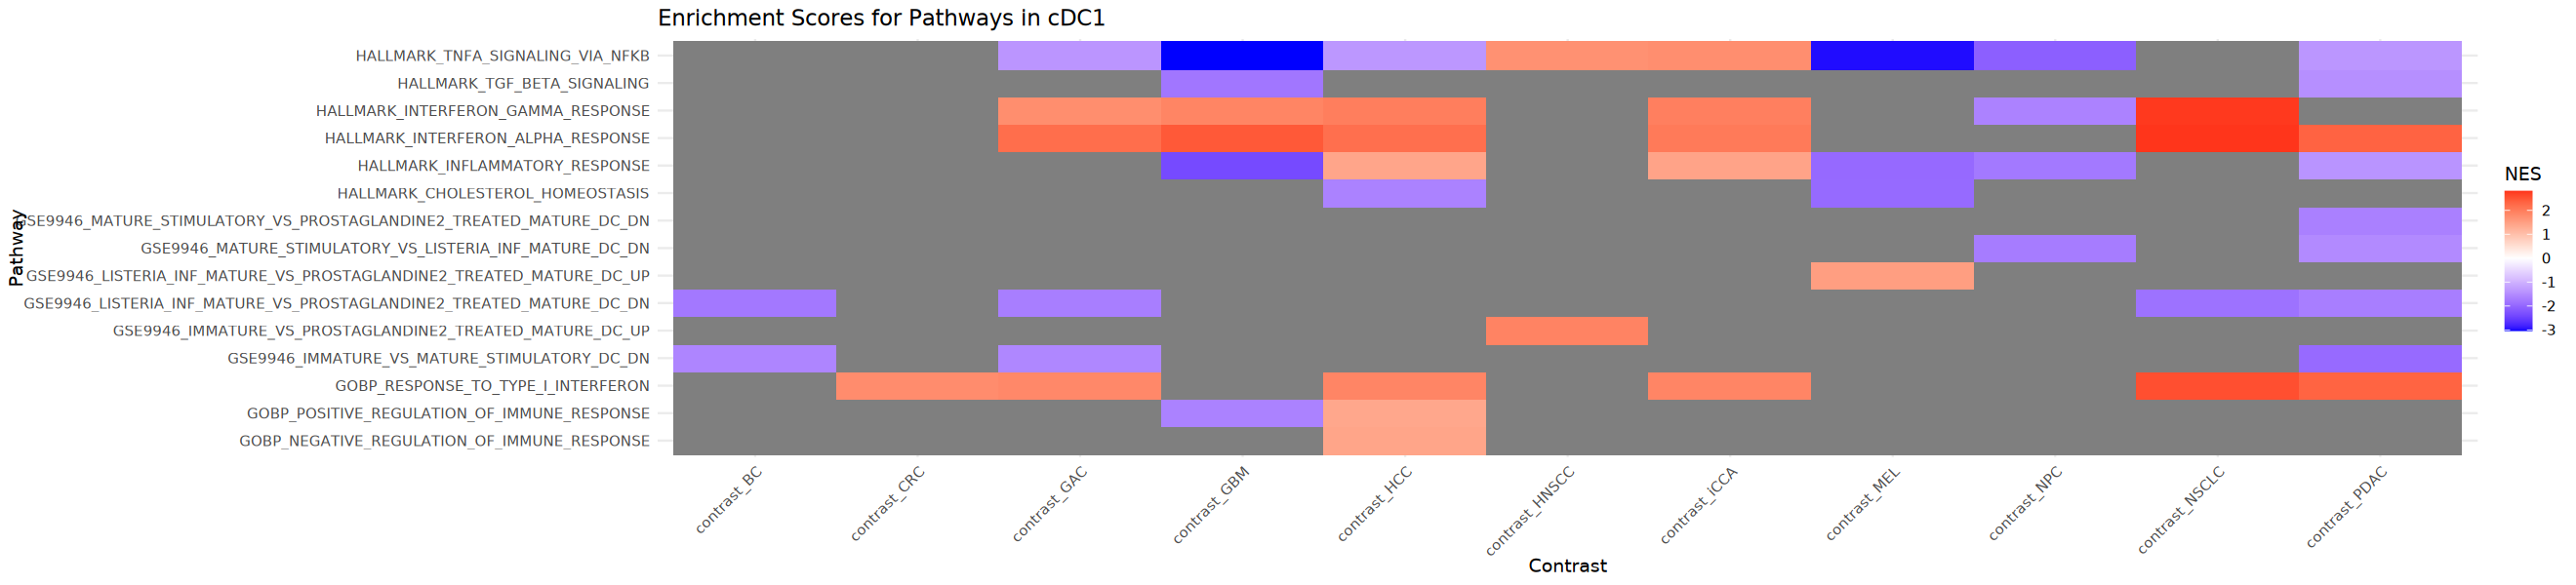

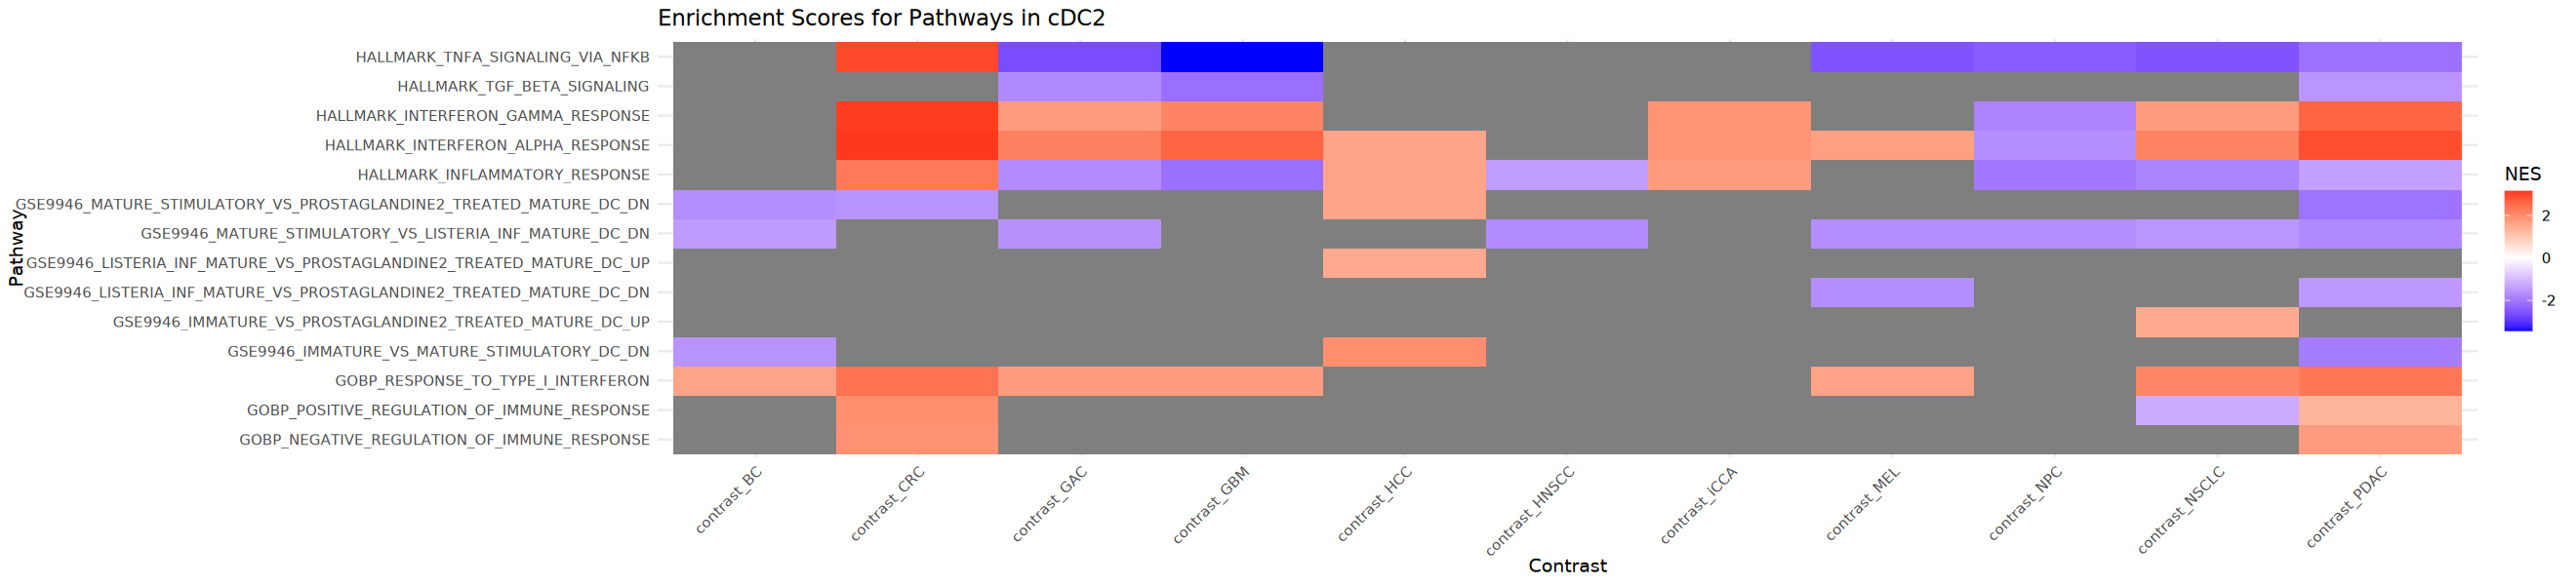

In [100]:
# Create the heatmap
options(repr.plot.height=5, repr.plot.width=22)
ggplot(es_mregDC_long, aes(x = contrast, y = ID, fill = NES)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color scale
  theme_minimal() +
  labs(title = "Enrichment Scores for Pathways in mregDC", x = "Contrast", y = "Pathway") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Create the heatmap
options(repr.plot.height=5, repr.plot.width=22)
ggplot(es_cDC1_long, aes(x = contrast, y = ID, fill = NES)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color scale
  theme_minimal() +
  labs(title = "Enrichment Scores for Pathways in cDC1", x = "Contrast", y = "Pathway") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Create the heatmap
options(repr.plot.height=5, repr.plot.width=22)
ggplot(es_cDC2_long, aes(x = contrast, y = ID, fill = NES)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color scale
  theme_minimal() +
  labs(title = "Enrichment Scores for Pathways in cDC2", x = "Contrast", y = "Pathway") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Make figure with pathways of interest

In [101]:
head(es_mregDC_wide)

,ID,contrast_BC,contrast_CRC,contrast_GAC,contrast_GBM,contrast_HCC,contrast_HNSCC,contrast_iCCA,contrast_MEL,contrast_NPC,contrast_NSCLC,contrast_PDAC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.806008,2.146442,NA,1.373076,1.665262,1.472512,NA,1.647072,NA,2.083032,2.071131
2,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.563878,2.431645,NA,NA,1.378254,1.521486,NA,1.683536,NA,1.680758,1.706992
3,GOBP_RESPONSE_TO_TYPE_I_INTERFERON,2.061784,2.316508,1.770254,NA,2.249696,NA,1.842629,1.958861,NA,2.727762,1.728376
4,GSE9946_IMMATURE_VS_LISTERIA_INF_MATURE_DC_UP,NA,NA,NA,NA,NA,NA,NA,NA,1.598675,NA,NA
5,GSE9946_IMMATURE_VS_MATURE_STIMULATORY_DC_DN,NA,NA,NA,NA,NA,1.582482,NA,NA,1.753917,NA,NA
6,GSE9946_IMMATURE_VS_PROSTAGLANDINE2_TREATED_MATURE_DC_UP,NA,1.483072,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [107]:
# filter pathways
es_mregDC_wide_f <- es_mregDC_wide[es_mregDC_wide$ID %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                                                                "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                                                                "HALLMARK_TNFA_SIGNALING_VIA_NFKB"
                                                                ), ]

es_cDC1_wide_f <- es_cDC1_wide[es_cDC1_wide$ID %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                                                                "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                                                                "HALLMARK_TNFA_SIGNALING_VIA_NFKB"
                                                                ), ]

es_cDC2_wide_f <- es_cDC2_wide[es_cDC2_wide$ID %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE",
                                                                "HALLMARK_INTERFERON_ALPHA_RESPONSE",
                                                                "HALLMARK_INTERFERON_GAMMA_RESPONSE",
                                                                "HALLMARK_TNFA_SIGNALING_VIA_NFKB"
                                                                ), ]


In [108]:
# Reshape the data to wide and then long format for plotting
es_mregDC_long <- melt(es_mregDC_wide_f, id.vars = "ID", variable.name = "contrast", value.name = "NES")

es_cDC1_long <- melt(es_cDC1_wide_f, id.vars = "ID", variable.name = "contrast", value.name = "NES")

es_cDC2_long <- melt(es_cDC2_wide_f, id.vars = "ID", variable.name = "contrast", value.name = "NES")

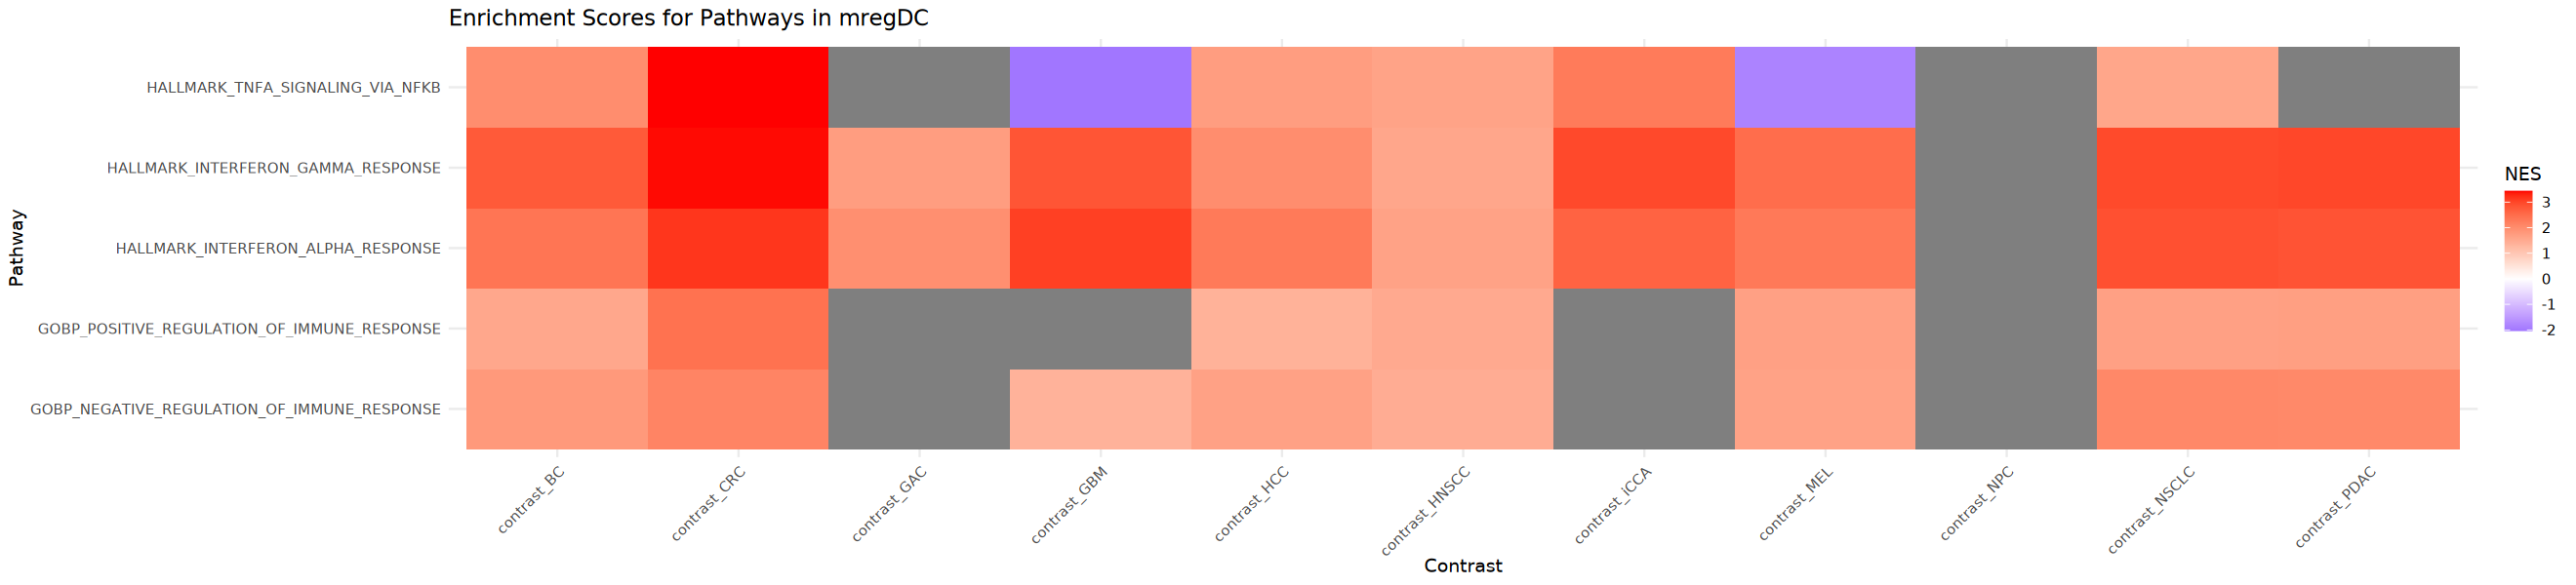

In [109]:
# Create the heatmap
options(repr.plot.height=5, repr.plot.width=22)
ggplot(es_mregDC_long, aes(x = contrast, y = ID, fill = NES)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color scale
  theme_minimal() +
  labs(title = "Enrichment Scores for Pathways in mregDC", x = "Contrast", y = "Pathway") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability